In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style


In [2]:
#importing the dataset
df = pd.read_csv('framingham.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
#getting an overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
#separating the categorical and numerical values after observing the number of unique classes
cat = []
num = []
for col in df.columns:
    print("unique classes are:", df[col].nunique())
    if df[col].nunique() < 5:
        cat.append(col)
    else:
        num.append(col)

unique classes are: 2
unique classes are: 39
unique classes are: 4
unique classes are: 2
unique classes are: 33
unique classes are: 2
unique classes are: 2
unique classes are: 2
unique classes are: 2
unique classes are: 248
unique classes are: 234
unique classes are: 146
unique classes are: 1363
unique classes are: 73
unique classes are: 143
unique classes are: 2


In [6]:
print("categorical features: ", cat)
print("numerical features: ", num)

categorical features:  ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
numerical features:  ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [7]:
#using describe to gain further insight
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0
sysBP,4238.0,132.352407,22.038097,83.50,117.00,128.0,144.000,295.0
diaBP,4238.0,82.893464,11.910850,48.00,75.00,82.0,89.875,142.5
BMI,4219.0,25.802008,4.080111,15.54,23.07,25.4,28.040,56.8
heartRate,4237.0,75.878924,12.026596,44.00,68.00,75.0,83.000,143.0
glucose,3850.0,81.966753,23.959998,40.00,71.00,78.0,87.000,394.0


In [8]:
# didn't worked as planned
df[cat].describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.0,0.0,0.0,1.0,1.0
education,4133.0,1.978950,1.019791,1.0,1.0,2.0,3.0,4.0
currentSmoker,4238.0,0.494101,0.500024,0.0,0.0,0.0,1.0,1.0
BPMeds,4185.0,0.029630,0.169584,0.0,0.0,0.0,0.0,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.0,0.0,0.0,0.0,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.0,0.0,0.0,1.0,1.0
diabetes,4238.0,0.025720,0.158316,0.0,0.0,0.0,0.0,1.0
TenYearCHD,4238.0,0.151958,0.359023,0.0,0.0,0.0,0.0,1.0


In [9]:
# fixing the problem by changing categorical to object type from int and float
for col in cat:
    df[col] = df[col].astype(object)

In [10]:
#after changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   object 
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   object 
 8   diabetes         4238 non-null   object 
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   object 
dtypes: float64(7), int64(1), object(8)
memory usage: 529.9+ KB


In [11]:
# using describe again
df[cat].describe()

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
count,4238,4133.0,4238,4185.0,4238,4238,4238,4238
unique,2,4.0,2,2.0,2,2,2,2
top,0,1.0,0,0.0,0,0,0,0
freq,2419,1720.0,2144,4061.0,4213,2922,4129,3594


In [12]:
for col in cat:
    print(col.upper(), " : ", df[col].nunique())
    print(df[col].value_counts().sort_values())
    print()

MALE  :  2
male
1    1819
0    2419
Name: count, dtype: int64

EDUCATION  :  4
education
4.0     473
3.0     687
2.0    1253
1.0    1720
Name: count, dtype: int64

CURRENTSMOKER  :  2
currentSmoker
1    2094
0    2144
Name: count, dtype: int64

BPMEDS  :  2
BPMeds
1.0     124
0.0    4061
Name: count, dtype: int64

PREVALENTSTROKE  :  2
prevalentStroke
1      25
0    4213
Name: count, dtype: int64

PREVALENTHYP  :  2
prevalentHyp
1    1316
0    2922
Name: count, dtype: int64

DIABETES  :  2
diabetes
1     109
0    4129
Name: count, dtype: int64

TENYEARCHD  :  2
TenYearCHD
1     644
0    3594
Name: count, dtype: int64



In [13]:
#fixing the column name for accuracy
df.rename(columns={'male': "gender"}, inplace=True)
cat[0] = "gender"

In [14]:
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [15]:
#checking for duplicates
df.duplicated().sum()
#0 means no duplicates

0

In [16]:
df.isnull().sum()

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [17]:
#checking for num as percentage
round((df.isnull().sum()*100)/df.shape[0], 2).sort_values()

gender             0.00
age                0.00
currentSmoker      0.00
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
sysBP              0.00
diaBP              0.00
TenYearCHD         0.00
heartRate          0.02
BMI                0.45
cigsPerDay         0.68
totChol            1.18
BPMeds             1.25
education          2.48
glucose            9.16
dtype: float64

In [18]:
# filling the null values of categorical features using mode
df_copy = df.copy()
for col in cat:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [19]:
#checking for num as percentage
round((df.isnull().sum()*100)/df.shape[0], 2).sort_values()

gender             0.00
age                0.00
education          0.00
currentSmoker      0.00
BPMeds             0.00
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
sysBP              0.00
diaBP              0.00
TenYearCHD         0.00
heartRate          0.02
BMI                0.45
cigsPerDay         0.68
totChol            1.18
glucose            9.16
dtype: float64

In [20]:
cat.remove('TenYearCHD')
target = "TenYearCHD"
print(cat)

['gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


In [21]:
#separating the categorical and numerical values after observing the number of unique classes
cat = []
num = []
for col in df.columns:
    if df[col].nunique() < 5:
        cat.append(col)
    else:
        num.append(col)
print("categorical : ",cat)
print(" numerical : ", num)

categorical :  ['gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
 numerical :  ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [22]:
df[cat].astype(object).describe()

,gender,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
count,4238,4238.0,4238,4238.0,4238,4238,4238,4238
unique,2,4.0,2,2.0,2,2,2,2
top,0,1.0,0,0.0,0,0,0,0
freq,2419,1825.0,2144,4114.0,4213,2922,4129,3594


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   object 
 8   diabetes         4238 non-null   object 
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   object 
dtypes: float64(9), int64(1), object(6)
memory usage: 529.9+ KB


In [24]:
for col in cat:
    df[col] = df[col].astype('object')

In [25]:
df_new = df.copy()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4238 non-null   object 
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4238 non-null   object 
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   object 
 8   diabetes         4238 non-null   object 
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   object 
dtypes: float64(7), int64(1), object(8)
memory usage: 529.9+ KB


In [27]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4238 non-null   object 
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4238 non-null   object 
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   object 
 8   diabetes         4238 non-null   object 
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   object 
dtypes: float64(7), int64(1), object(8)
memory usage: 529.9+ KB


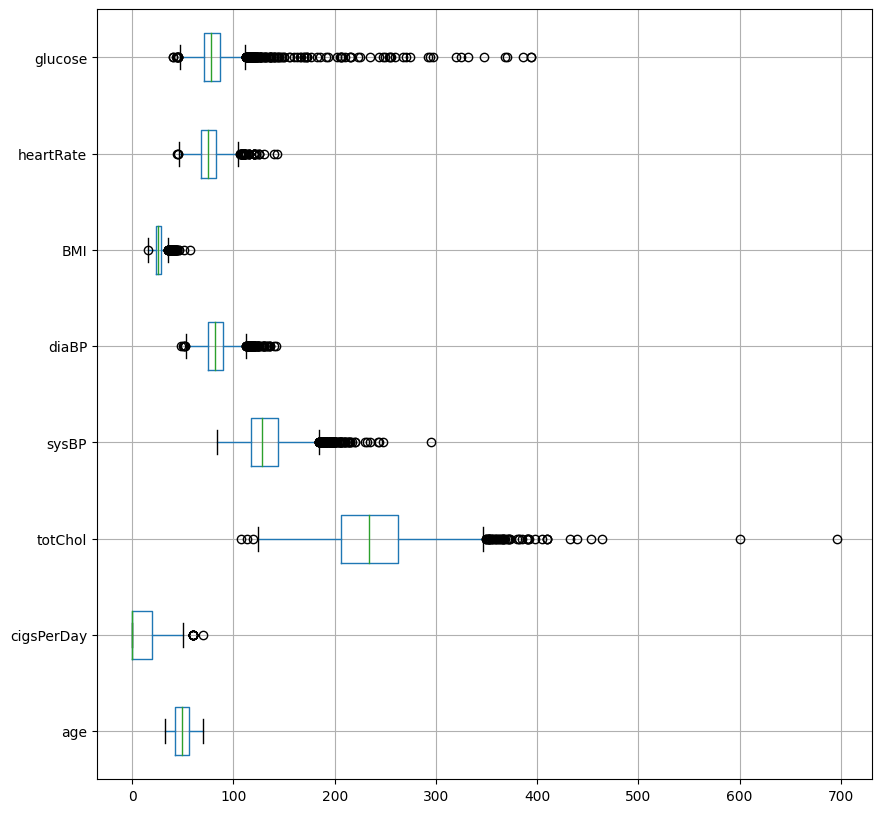

In [28]:
plt.figure(figsize=(10,10))
df_new.boxplot(vert=0)
plt.show()

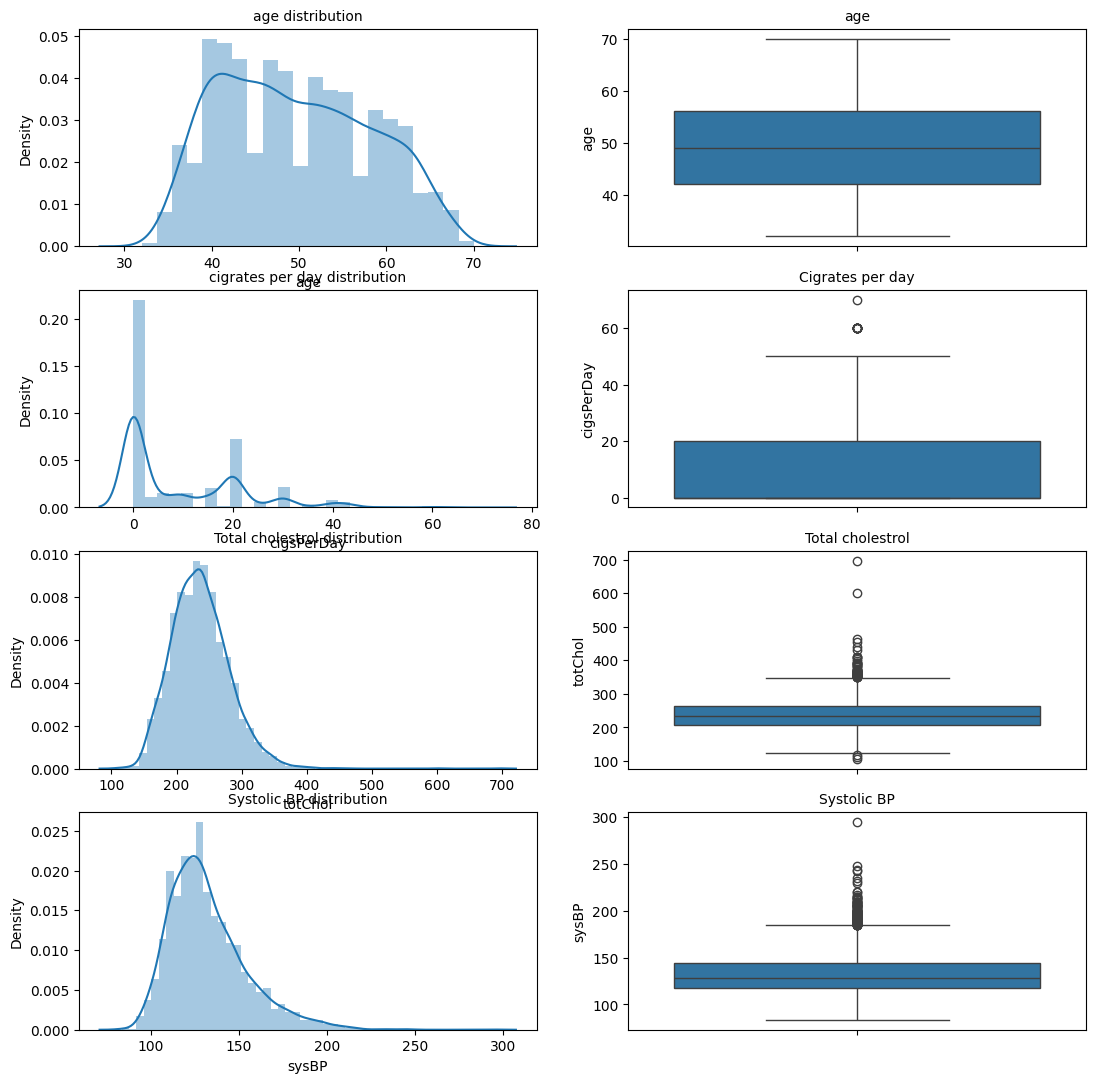

In [29]:
import warnings
warnings.filterwarnings('ignore')

#let's visualize the elements

fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(13.0, 13.0)
a = sns.distplot(df_new['age'], ax=axes[0][0])
a.set_title("age distribution", fontsize=10)

a = sns.boxplot(df_new['age'], orient="v", ax=axes[0][1])
a.set_title("age", fontsize=10)

a = sns.distplot(df_new['cigsPerDay'], ax = axes[1][0])
a.set_title("cigrates per day distribution", fontsize=10)


a = sns.boxplot(df_new['cigsPerDay'], orient='v', ax = axes[1][1])
a.set_title("Cigrates per day", fontsize=10)

a = sns.distplot(df_new['totChol'], ax = axes[2][0])
a.set_title("Total cholestrol distribution", fontsize=10)


a = sns.boxplot(df_new['totChol'], orient='v', ax = axes[2][1])
a.set_title("Total cholestrol", fontsize=10)

a = sns.distplot(df_new['sysBP'], ax = axes[3][0])
a.set_title("Systolic BP distribution", fontsize=10)


a = sns.boxplot(df_new['sysBP'], orient='v', ax = axes[3][1])
a.set_title("Systolic BP", fontsize=10)

plt.show()


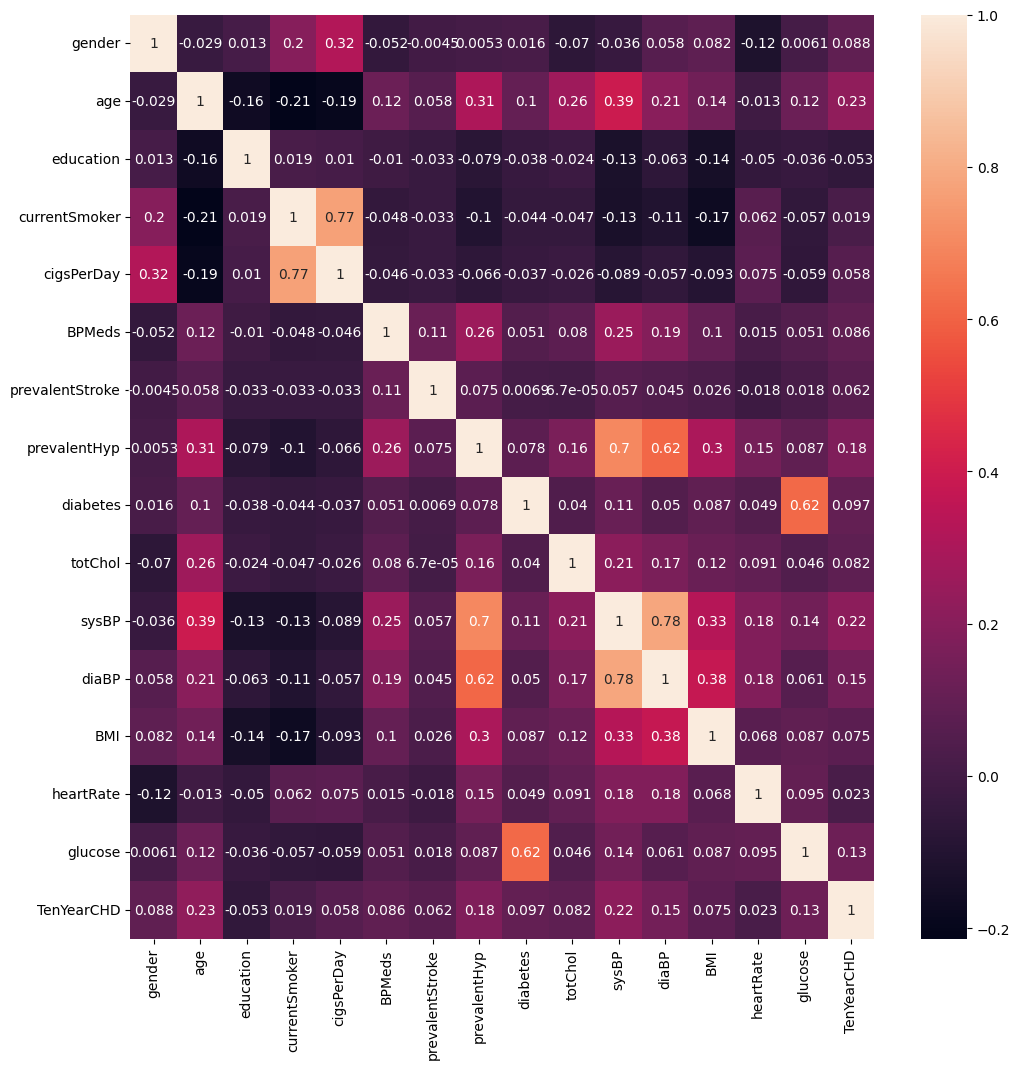

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(df_new.corr(), annot=True)
plt.show()

We can remove the diaBP as it has high correlation with sysBP (they are closely related), and is less related to the target variable when compared with sysBP, this is because multicollinearity can cofuse our model as it skews it.
Same can be done for diabetes due to its high correlation with glucose, and low correlation with target also for currentsmoker and prevalentHyp.

In [31]:
def remove_columns(df, ls):
    df.drop(ls, axis=1, inplace=True)

ls = ['currentSmoker', 'diaBP', 'diabetes', "prevalentHyp"]
remove_columns(df_new, ls)

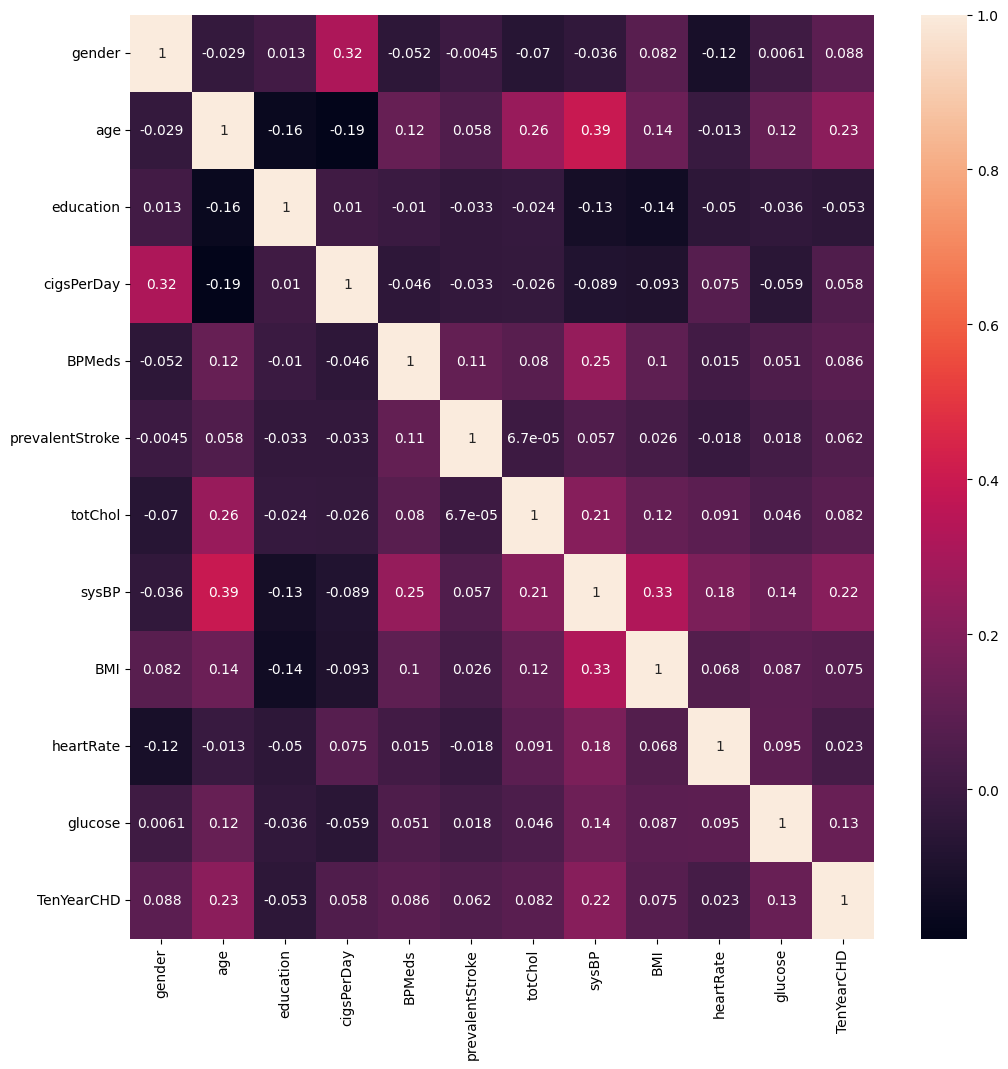

In [32]:
plt.figure(figsize=(12,12))
sns.heatmap(df_new.corr(), annot=True)
plt.show()

In [33]:
def get_cat_num_ls(df):
    cat = []
    num = []
    for col in df.columns:
        if df[col].nunique() < 5:
            cat.append(col)
        else:
            num.append(col)
    return cat, num

cat, num = get_cat_num_ls(df_new)

In [34]:
#for the numerical value let's use all three mean, median, and predictive modeling to see the difference
#also we need to make sure numerical values are handles well because null value are more in number in numerical features
#(other than the education column that was a categorical feature)
df_mean = df_new.copy()
df_med = df_new.copy()
df_im = df_new.copy()

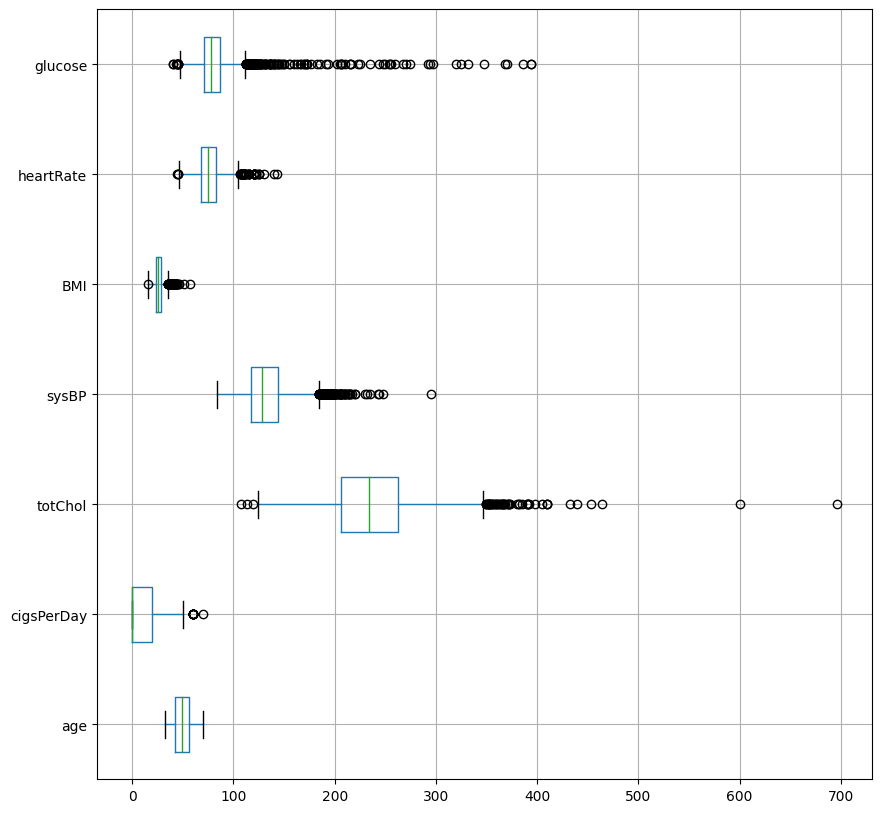

In [35]:
plt.figure(figsize=(10,10))
df_mean.boxplot(vert=0)
plt.show()

In [36]:
for col in num:
    df_mean[col].fillna(df_mean[col].mean(), inplace=True)


for col in num:
    df_med[col].fillna(df_med[col].median(), inplace=True)


In [37]:
print(cat, num)

['gender', 'education', 'BPMeds', 'prevalentStroke', 'TenYearCHD'] ['age', 'cigsPerDay', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose']


In [38]:
#checking for num as percentage after filling mean
round((df_mean.isnull().sum()*100)/df_mean.shape[0], 2).sort_values()

gender             0.0
age                0.0
education          0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
totChol            0.0
sysBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

In [39]:
#checking for num as percentage after median filling
round((df_med.isnull().sum()*100)/df_med.shape[0], 2).sort_values()

gender             0.0
age                0.0
education          0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
totChol            0.0
sysBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

In [40]:
#null values in df_im
round((df_im.isnull().sum()*100)/df_im.shape[0], 2).sort_values()

gender             0.00
age                0.00
education          0.00
BPMeds             0.00
prevalentStroke    0.00
sysBP              0.00
TenYearCHD         0.00
heartRate          0.02
BMI                0.45
cigsPerDay         0.68
totChol            1.18
glucose            9.16
dtype: float64

In [41]:
#due to a significant amt of null values in education it would be better to impute them using KNNImputer alongside
#null values
df_im.head()

,gender,age,education,cigsPerDay,BPMeds,prevalentStroke,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,195.0,106.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,0.0,0,250.0,121.0,28.73,95.0,76.0,0
2,1,48,1.0,20.0,0.0,0,245.0,127.5,25.34,75.0,70.0,0
3,0,61,3.0,30.0,0.0,0,225.0,150.0,28.58,65.0,103.0,1
4,0,46,3.0,23.0,0.0,0,285.0,130.0,23.10,85.0,85.0,0


In [42]:
df_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4238 non-null   object 
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4238 non-null   object 
 5   prevalentStroke  4238 non-null   object 
 6   totChol          4188 non-null   float64
 7   sysBP            4238 non-null   float64
 8   BMI              4219 non-null   float64
 9   heartRate        4237 non-null   float64
 10  glucose          3850 non-null   float64
 11  TenYearCHD       4238 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 397.4+ KB


In [43]:
for col in df_im.columns:
    if df_im[col].dtype == object:
        df_im[col] = df_im[col].astype("float")

In [44]:
df_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4238 non-null   float64
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4238 non-null   float64
 5   prevalentStroke  4238 non-null   float64
 6   totChol          4188 non-null   float64
 7   sysBP            4238 non-null   float64
 8   BMI              4219 non-null   float64
 9   heartRate        4237 non-null   float64
 10  glucose          3850 non-null   float64
 11  TenYearCHD       4238 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 397.4 KB


In [45]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_new = imputer.fit_transform(df_im)
df_im = pd.DataFrame(data=df_new, columns=df_im.columns)

In [46]:
#checking for num as percentage after using KNNImputer
round((df_im.isnull().sum()*100)/df_im.shape[0], 2).sort_values()

gender             0.0
age                0.0
education          0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
totChol            0.0
sysBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

In [47]:
for col in cat:
    df_im[col] = df_im[col].astype("object")
df_im[target] = df_im[target].astype("object")

In [48]:
df_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4238 non-null   object 
 1   age              4238 non-null   float64
 2   education        4238 non-null   object 
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4238 non-null   object 
 5   prevalentStroke  4238 non-null   object 
 6   totChol          4238 non-null   float64
 7   sysBP            4238 non-null   float64
 8   BMI              4238 non-null   float64
 9   heartRate        4238 non-null   float64
 10  glucose          4238 non-null   float64
 11  TenYearCHD       4238 non-null   object 
dtypes: float64(7), object(5)
memory usage: 397.4+ KB


In [49]:
df_mean.columns

Index(['gender', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [50]:
df_mean.head()

,gender,age,education,cigsPerDay,BPMeds,prevalentStroke,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,195.0,106.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,0.0,0,250.0,121.0,28.73,95.0,76.0,0
2,1,48,1.0,20.0,0.0,0,245.0,127.5,25.34,75.0,70.0,0
3,0,61,3.0,30.0,0.0,0,225.0,150.0,28.58,65.0,103.0,1
4,0,46,3.0,23.0,0.0,0,285.0,130.0,23.10,85.0,85.0,0


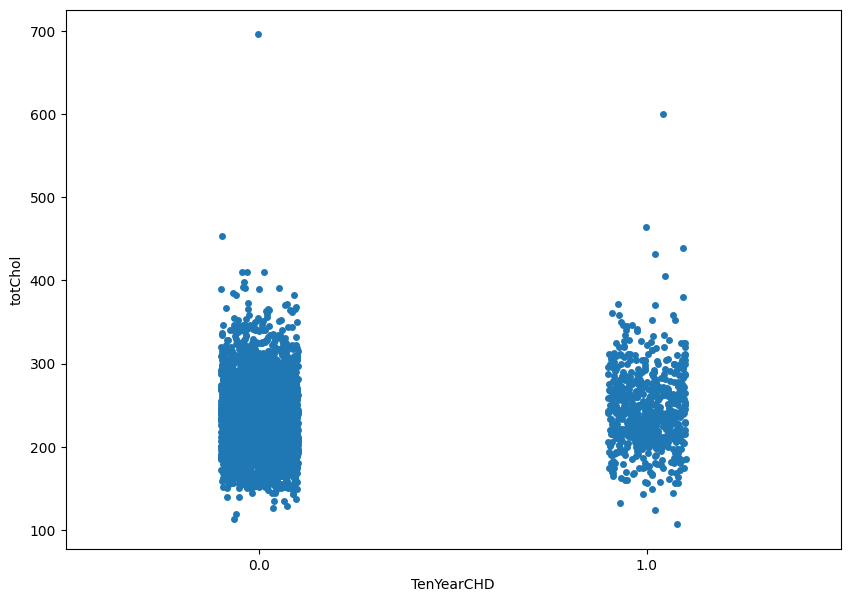

In [51]:
plt.figure(figsize=(10,7))
sns.stripplot(x=df_im["TenYearCHD"],y= df_im["totChol"],jitter=True)
plt.show()

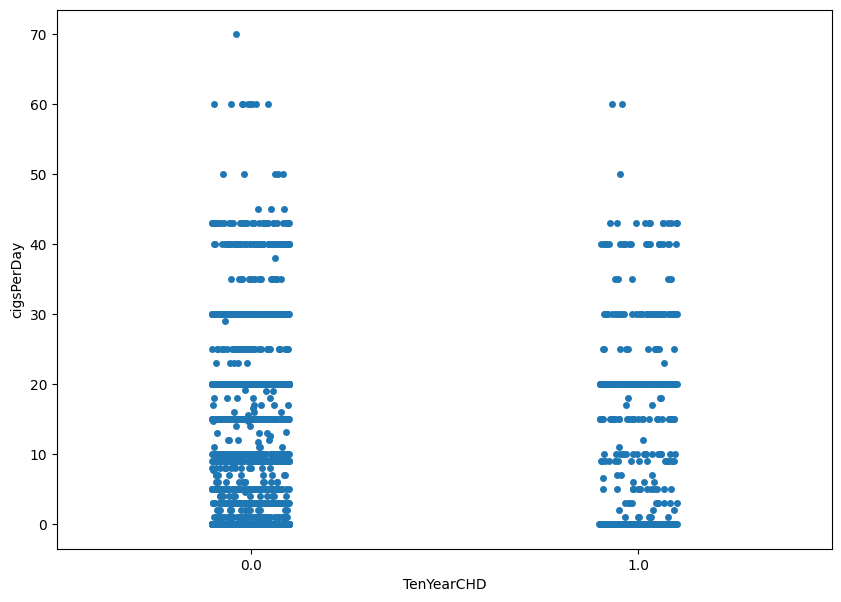

In [52]:
plt.figure(figsize=(10,7))
sns.stripplot(x=df_im["TenYearCHD"],y= df_im["cigsPerDay"],jitter=True)
plt.show()

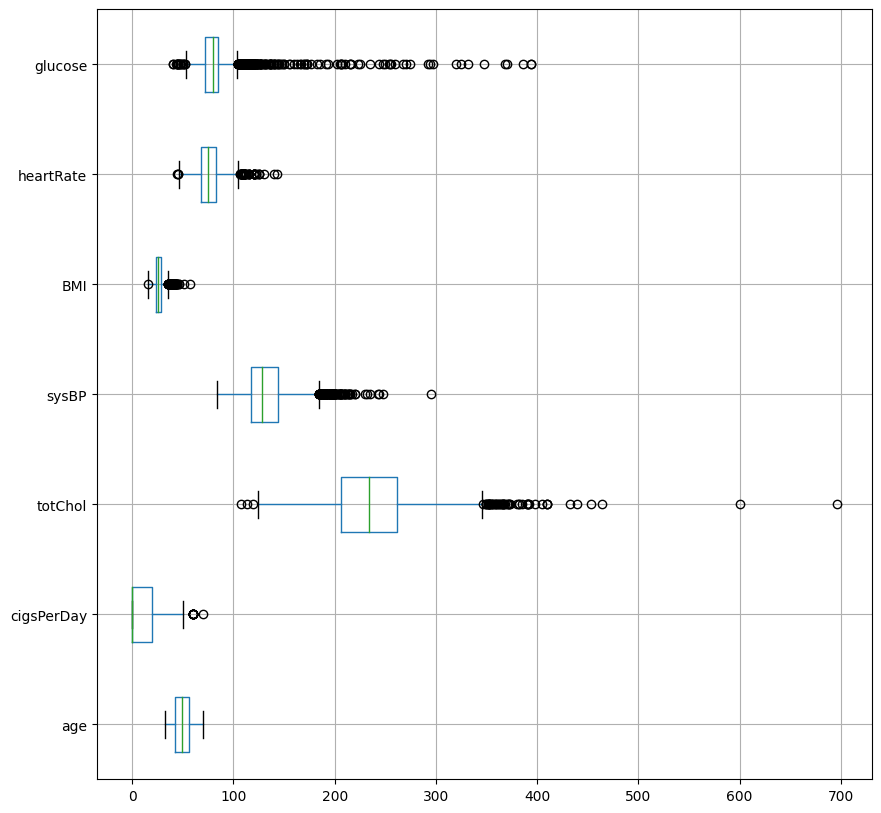

In [53]:
#let's deal with outliers
plt.figure(figsize=(10,10))
df_mean.boxplot(vert=0)
plt.show()

In [54]:
def get_low_up_range_for_outliers(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR=Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

In [55]:
def remove_outliers(df):
    for col in df.drop([target, 'glucose'], axis=1).columns:
        lr, ur = get_low_up_range_for_outliers(df[col])
        df[col] = np.where(df[col]>ur, ur, df[col])
        df[col] = np.where(df[col]<lr, lr, df[col])
    return df

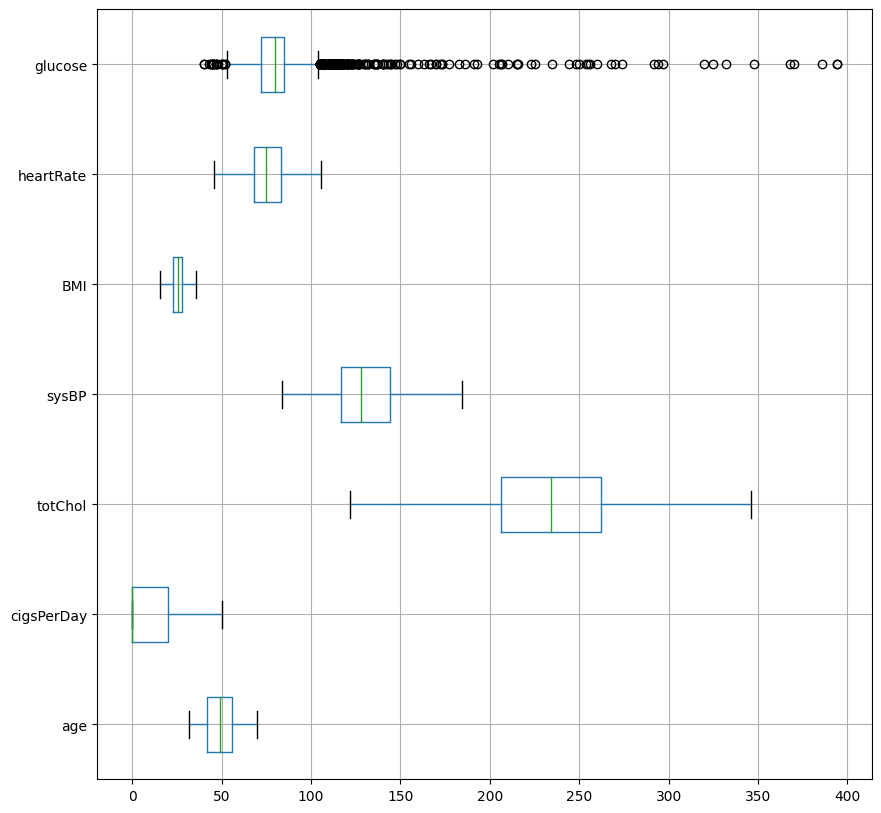

In [56]:
df_mean_O = remove_outliers(df_mean)
plt.figure(figsize=(10,10))
df_mean_O.boxplot(vert=0)
plt.show()

In [57]:
df_med_O = remove_outliers(df_med)
df_im_new_0 = remove_outliers(df_im)

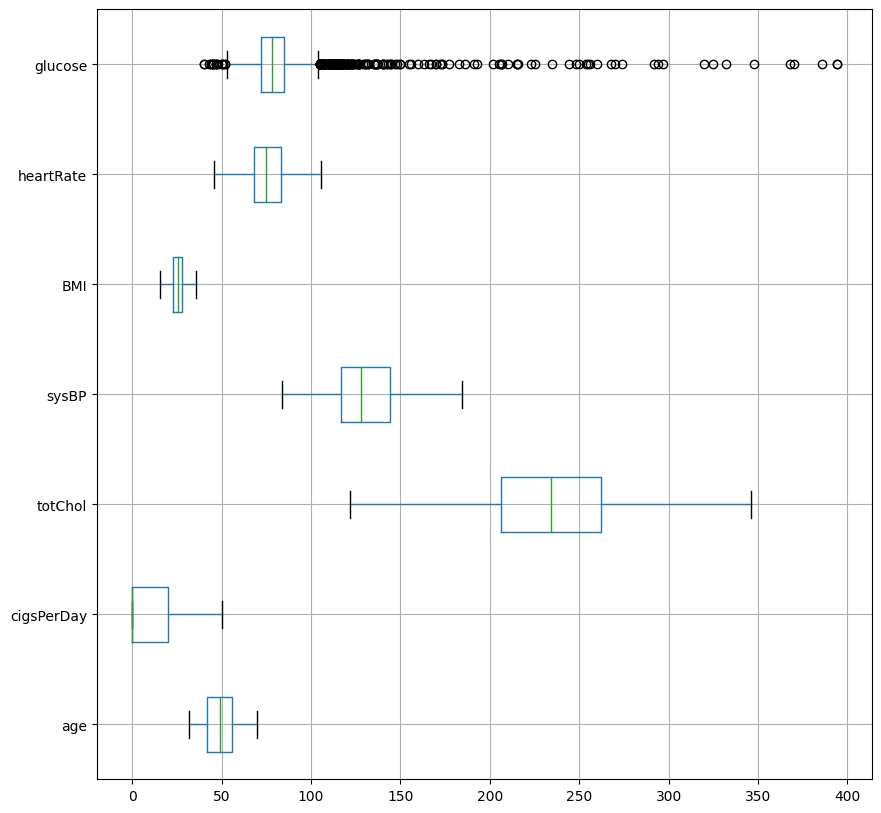

In [58]:
plt.figure(figsize=(10,10))
df_med_O.boxplot(vert=0)
plt.show()

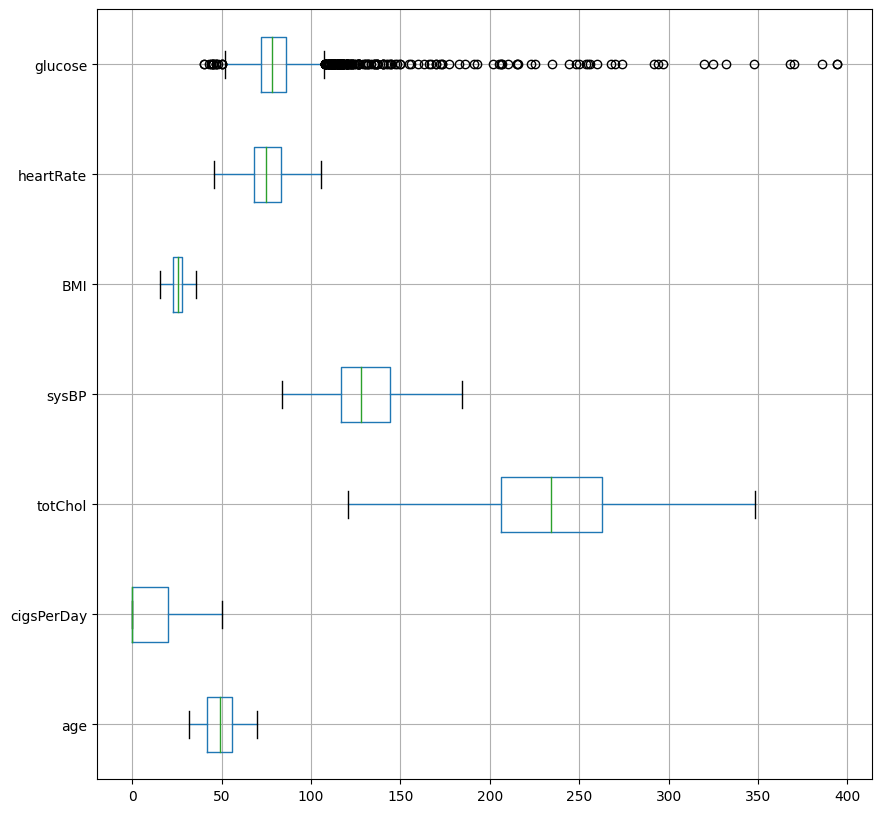

In [59]:
plt.figure(figsize=(10,10))
df_im_new_0.boxplot(vert=0)
plt.show()

now as the values can be from different ranges we need to scale them to make sure that it does not confuse the model

In [63]:
def scaling_df(df, num):
    for col in num:
        max = df[col].max()
        min = df[col].min()
        df[col] = df[col].apply(lambda x: (x-min) / (max-min))
    return df

In [64]:
df_mean_O = scaling_df(df_mean_O, num)
df_mean_O.head()

,gender,age,education,cigsPerDay,BPMeds,prevalentStroke,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,0.184211,4.0,0.00,0.0,0,0.325893,0.222772,0.571167,0.575000,0.104520,0
1,0,0.368421,2.0,0.00,0.0,0,0.571429,0.371287,0.659922,0.825000,0.101695,0
2,1,0.421053,1.0,0.40,0.0,0,0.549107,0.435644,0.488969,0.491667,0.084746,0
3,0,0.763158,3.0,0.60,0.0,0,0.459821,0.658416,0.652358,0.325000,0.177966,1
4,0,0.368421,3.0,0.46,0.0,0,0.727679,0.460396,0.376009,0.658333,0.127119,0


In [65]:
df_med_O = scaling_df(df_med_O, num)
df_med_O.head()

,gender,age,education,cigsPerDay,BPMeds,prevalentStroke,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,0.184211,4.0,0.00,0.0,0,0.325893,0.222772,0.571167,0.575000,0.104520,0
1,0,0.368421,2.0,0.00,0.0,0,0.571429,0.371287,0.659922,0.825000,0.101695,0
2,1,0.421053,1.0,0.40,0.0,0,0.549107,0.435644,0.488969,0.491667,0.084746,0
3,0,0.763158,3.0,0.60,0.0,0,0.459821,0.658416,0.652358,0.325000,0.177966,1
4,0,0.368421,3.0,0.46,0.0,0,0.727679,0.460396,0.376009,0.658333,0.127119,0


In [66]:
df_im_new_0 = scaling_df(df_im_new_0, num)
df_im_new_0.head()

,gender,age,education,cigsPerDay,BPMeds,prevalentStroke,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.184211,4.0,0.00,0.0,0.0,0.326754,0.222772,0.571069,0.575000,0.104520,0.0
1,0.0,0.368421,2.0,0.00,0.0,0.0,0.567982,0.371287,0.659778,0.825000,0.101695,0.0
2,1.0,0.421053,1.0,0.40,0.0,0.0,0.546053,0.435644,0.488911,0.491667,0.084746,0.0
3,0.0,0.763158,3.0,0.60,0.0,0.0,0.458333,0.658416,0.652218,0.325000,0.177966,1.0
4,0.0,0.368421,3.0,0.46,0.0,0.0,0.721491,0.460396,0.376008,0.658333,0.127119,0.0


In [68]:
from sklearn.model_selection import train_test_split

X = df_im_new_0.drop(target, axis = 1)
y = df_im_new_0[target].astype('int')

print(X.head(), y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)
df_im_new_0.to_csv("dataset.csv")


  gender       age education  cigsPerDay BPMeds prevalentStroke   totChol  \
0    1.0  0.184211       4.0        0.00    0.0             0.0  0.326754   
1    0.0  0.368421       2.0        0.00    0.0             0.0  0.567982   
2    1.0  0.421053       1.0        0.40    0.0             0.0  0.546053   
3    0.0  0.763158       3.0        0.60    0.0             0.0  0.458333   
4    0.0  0.368421       3.0        0.46    0.0             0.0  0.721491   

      sysBP       BMI  heartRate   glucose  
0  0.222772  0.571069   0.575000  0.104520  
1  0.371287  0.659778   0.825000  0.101695  
2  0.435644  0.488911   0.491667  0.084746  
3  0.658416  0.652218   0.325000  0.177966  
4  0.460396  0.376008   0.658333  0.127119   0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int32


In [69]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1084
           1       0.44      0.17      0.25       188

    accuracy                           0.85      1272
   macro avg       0.65      0.57      0.58      1272
weighted avg       0.81      0.85      0.81      1272



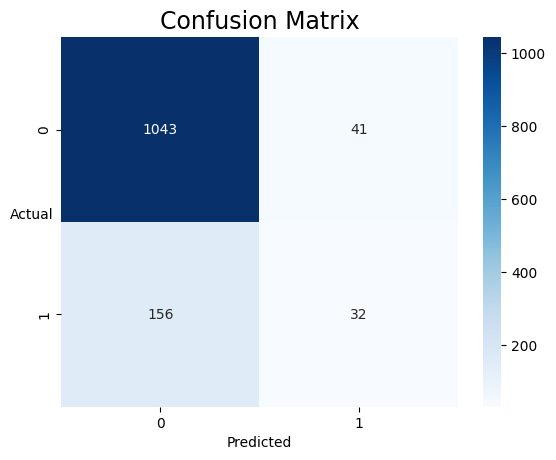

In [78]:
sns.heatmap((confusion_matrix(y_test, y_pred)), annot=True, fmt='.5g', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual", rotation=0)
plt.title("Confusion Matrix", fontsize=17)
plt.show()

In [98]:
#let's try to oversample the monority class using SMOTE and ADASYN

from imblearn.over_sampling import SMOTE, ADASYN

sms = SMOTE()
ada = ADASYN()

X_train_s, y_train_s = sms.fit_resample(X_train, y_train)
X_train_a, y_train_a = ada.fit_resample(X_train, y_train)

model_s = GaussianNB()
model_s.fit(X_train_s, y_train_s)

y_pred_s = model_s.predict(X_test)
print(classification_report(y_test, y_pred_s))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1084
           1       0.27      0.51      0.35       188

    accuracy                           0.73      1272
   macro avg       0.59      0.64      0.59      1272
weighted avg       0.81      0.73      0.76      1272



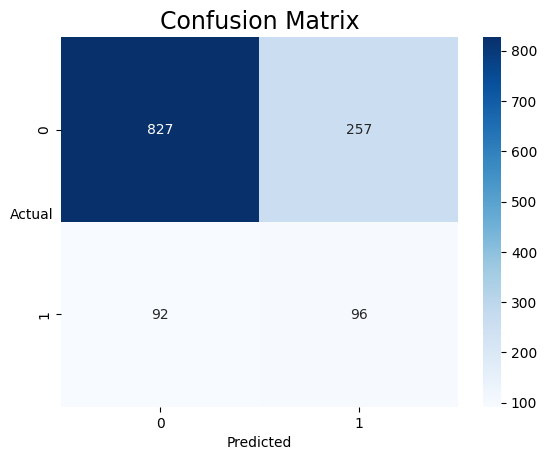

In [99]:
sns.heatmap((confusion_matrix(y_test, y_pred_s)), annot=True, fmt='.5g', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual", rotation=0)
plt.title("Confusion Matrix", fontsize=17)
plt.show()

In [102]:
model_a = GaussianNB()
model_a.fit(X_train_a, y_train_a)

y_pred_a = model_a.predict(X_test)
print(classification_report(y_test, y_pred_a))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1084
           1       0.27      0.52      0.36       188

    accuracy                           0.72      1272
   macro avg       0.59      0.64      0.59      1272
weighted avg       0.81      0.72      0.75      1272



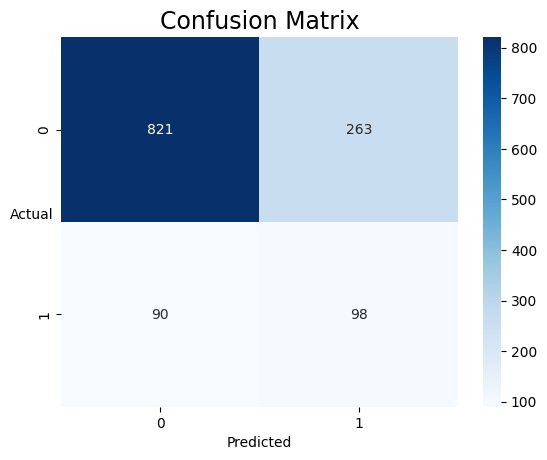

In [103]:
sns.heatmap((confusion_matrix(y_test, y_pred_a)), annot=True, fmt='.5g', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual", rotation=0)
plt.title("Confusion Matrix", fontsize=17)
plt.show()

In [104]:
#using oversampling improved the model performance now let's try to combine it with undersampling
from imblearn.under_sampling import NearMiss

nr = NearMiss(version=3)
X_train_a_nr, y_train_a_nr = nr.fit_resample(X_train_a, y_train_a)
model_a_nr = GaussianNB()
model_a_nr.fit(X_train_a_nr, y_train_a_nr)

y_pred_a_nr = model_a_nr.predict(X_test)
print(classification_report(y_test, y_pred_a_nr))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1084
           1       0.27      0.60      0.37       188

    accuracy                           0.70      1272
   macro avg       0.59      0.66      0.58      1272
weighted avg       0.82      0.70      0.74      1272



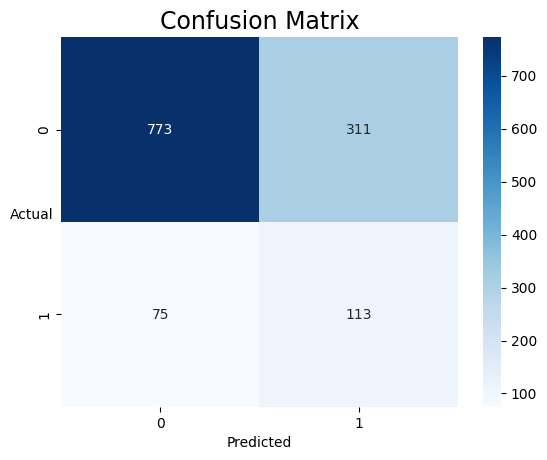

In [105]:
sns.heatmap((confusion_matrix(y_test, y_pred_a_nr)), annot=True, fmt='.5g', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual", rotation=0)
plt.title("Confusion Matrix", fontsize=17)
plt.show()

In [107]:
#now let's also try penalised model so that even the left class imbalance can't effect the model accuracy
#because here predicting the heartattack when there is heartattack is the most important parameter
#so we need to make sure that the recall and the accuracy for that class remains high up
from sklearn.svm import SVC

svc_model_a_nr = SVC(class_weight='balanced', probability=True)
svc_model_a_nr.fit(X_train_a_nr, y_train_a_nr)

svc_predict = svc_model_a_nr.predict(X_test)
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       0.93      0.54      0.69      1084
           1       0.23      0.78      0.35       188

    accuracy                           0.58      1272
   macro avg       0.58      0.66      0.52      1272
weighted avg       0.83      0.58      0.64      1272



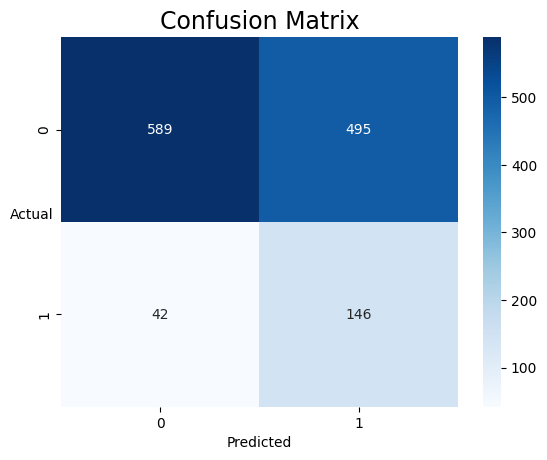

In [108]:
sns.heatmap((confusion_matrix(y_test, svc_predict)), annot=True, fmt='.5g', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual", rotation=0)
plt.title("Confusion Matrix", fontsize=17)
plt.show()

well Guess we failed in that one so naive bayes can be used for now as the main model.

In [121]:
def training_models(X_train, X_test, y_train, y_test):
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
    from sklearn.naive_bayes import GaussianNB
    model_1 = LogisticRegression()
    model_2 = DecisionTreeClassifier()
    model_3 = RandomForestClassifier(n_estimators=100)
    model_4 = AdaBoostClassifier(n_estimators=100)
    model_5 = GradientBoostingClassifier()
    model_6 = GaussianNB()

    model_1.fit(X_train, y_train)
    model_2.fit(X_train, y_train)
    model_3.fit(X_train, y_train)
    model_4.fit(X_train, y_train)
    model_5.fit(X_train, y_train)
    model_6.fit(X_train, y_train)

    y_pred1 = model_1.predict(X_test)
    y_pred2 = model_2.predict(X_test)
    y_pred3 = model_3.predict(X_test)
    y_pred4 = model_4.predict(X_test)
    y_pred5 = model_5.predict(X_test)
    y_pred6 = model_6.predict(X_test)

    confusion_matrix_dict = {}
    confusion_matrix_dict["LogisticRegression"] = confusion_matrix(y_test, y_pred1)
    confusion_matrix_dict["DecisionTree"] = confusion_matrix(y_test, y_pred2)
    confusion_matrix_dict["RandomForest"] = confusion_matrix(y_test, y_pred3)
    confusion_matrix_dict["ADABoost"] = confusion_matrix(y_test, y_pred4)
    confusion_matrix_dict["GradientBoost"] = confusion_matrix(y_test, y_pred5)
    confusion_matrix_dict["NaiveBayes"] = confusion_matrix(y_test, y_pred6)

    classification_report_dict = {}
    classification_report_dict["LogisticRegression"] = classification_report(y_test, y_pred1)
    classification_report_dict["DecisionTree"] = classification_report(y_test, y_pred2)
    classification_report_dict["RandomForest"] = classification_report(y_test, y_pred3)
    classification_report_dict["ADABoost"] = classification_report(y_test, y_pred4)
    classification_report_dict["GradientBoost"] = classification_report(y_test, y_pred5)
    classification_report_dict["NaiveBayes"] = classification_report(y_test, y_pred6)

    return confusion_matrix_dict, classification_report_dict


In [122]:
confusion_matrix_dict, classification_report_dict = training_models(X_train_a_nr, X_test, y_train_a_nr, y_test)

In [123]:
for key, value in classification_report_dict.items():
    print(key, value)

LogisticRegression               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1084
           1       0.28      0.60      0.38       188

    accuracy                           0.71      1272
   macro avg       0.60      0.66      0.60      1272
weighted avg       0.82      0.71      0.75      1272

DecisionTree               precision    recall  f1-score   support

           0       0.86      0.81      0.84      1084
           1       0.19      0.27      0.22       188

    accuracy                           0.73      1272
   macro avg       0.53      0.54      0.53      1272
weighted avg       0.77      0.73      0.75      1272

RandomForest               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1084
           1       0.21      0.15      0.17       188

    accuracy                           0.79      1272
   macro avg       0.54      0.53      0.53      1272
weighted avg       0.76      

In [137]:
#let's try grid search
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

param_grid_log = {
    'penalty': ['l1', 'l2'],  # Used for regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithm to use in optimization
    'max_iter': [100, 200, 500, 1000],  # Maximum number of iterations
    'class_weight': [None, 'balanced']  # Class weights for imbalanced datasets
}

param_grid_NB = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}

model_1 = LogisticRegression()
model_2 = GaussianNB()

grid_search_log = GridSearchCV(estimator=model_1, param_grid=param_grid_log, cv=3)

grid_serach_NB = GridSearchCV(estimator=model_2, param_grid=param_grid_NB, cv=3)


In [138]:
grid_search_log.fit(X_train_a_nr, y_train_a_nr)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 500, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [139]:
y_pred = grid_search_log.predict(X_test)

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74      1084
           1       0.24      0.71      0.36       188

    accuracy                           0.63      1272
   macro avg       0.58      0.66      0.55      1272
weighted avg       0.82      0.63      0.68      1272



In [141]:
grid_serach_NB.fit(X_train_a_nr, y_train_a_nr)

GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                           1e-07, 1e-08, 1e-09, 1e-10, 1e-11,
                                           1e-12, 1e-13, 1e-14, 1e-15]})

In [142]:
y_pred_2 = grid_serach_NB.predict(X_test)

In [143]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1084
           1       0.25      0.62      0.36       188

    accuracy                           0.67      1272
   macro avg       0.58      0.65      0.57      1272
weighted avg       0.81      0.67      0.72      1272

